<a href="https://colab.research.google.com/github/YADHUKV01/MINI-PROJECT/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOADING DATASET

In [ ]:
# Import the necessary library for uploading files
from google.colab import files
import pandas as pd

# Upload the dataset
uploaded = files.upload()

# Load the dataset into a pandas DataFrame
# Replace 'your_file.csv' with the uploaded file name
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
data = pd.read_csv(file_name)

# Display the first few rows of the dataset to verify it's loaded correctly
data.head()


Saving divorce_prediction_india.csv to divorce_prediction_india.csv


,Age_Partner1,Age_Partner2,Years_Married,Children,Education_Level_Partner1,Education_Level_Partner2,Income_Partner1,Income_Partner2,Employment_Status_Partner1,Employment_Status_Partner2,Location,Religion,Cultural_Factors,Conflict_Frequency,Communication_Quality,Support_System,History_of_Abuse,Counseling,Divorce_Status
0,22,32,1,3,Postgraduate,Postgraduate,99563,28862,Self-Employed,Employed,Rural,Sikh,No,Occasionally,Good,Family and Friends,No,Yes,Yes
1,24,41,24,5,Postgraduate,Undergraduate,78965,75883,Unemployed,Unemployed,Rural,Hindu,Yes,Frequently,Poor,Family and Friends,No,Yes,No
2,54,59,10,2,Postgraduate,Graduate,42080,48937,Self-Employed,Self-Employed,Urban,Muslim,Yes,Occasionally,Good,Family and Friends,No,Yes,No
3,60,34,1,4,Undergraduate,Postgraduate,70203,54119,Self-Employed,Self-Employed,Urban,Muslim,Yes,Rarely,Excellent,NaN,No,Yes,No
4,49,22,26,0,Undergraduate,Undergraduate,32041,34311,Employed,Unemployed,Urban,Other,Yes,Frequently,Excellent,Family and Friends,Yes,No,Yes


# DATA PREPROCESSING

In [ ]:
# Import the necessary library for uploading files
from google.colab import files
import pandas as pd

# Upload the dataset
uploaded = files.upload()

# Load the dataset into a pandas DataFrame
# Replace 'your_file.csv' with the uploaded file name
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
data = pd.read_csv(file_name)

# Display the first few rows of the dataset to verify it's loaded correctly
data.head()

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Load the dataset (Assuming you've already uploaded and loaded the dataset as 'data')
# If not, use the code provided previously to upload the dataset

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Step 1: Handle missing values (if any)
# Replace missing values with the mean for numerical columns or the most frequent value for categorical columns
# Select only numerical columns for mean calculation
numerical_data = data.select_dtypes(include=['int64', 'float64'])
numerical_data.fillna(numerical_data.mean(), inplace=True)

# Fill missing values for categorical columns
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Step 2: Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Step 3: Feature scaling
# Standardizing numerical features
scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Step 4: Handle class imbalance (if needed)
# Separate the target variable
X = data.drop('Divorce_Status', axis=1)
y = data['Divorce_Status']

# Handling Imbalanced Dataset by Upsampling the Minority Class
# Concatenate our training data back together
data = pd.concat([X, y], axis=1)

# Separate majority and minority classes
majority_class = data[data.Divorce_Status == 0]
minority_class = data[data.Divorce_Status == 1]

# Check if either class is empty and handle accordingly
if len(majority_class) == 0:
    print("Error: Majority class is empty. Check your data or class labels.")
    # Handle the error appropriately, e.g., stop execution or adjust resampling strategy
elif len(minority_class) == 0:
    print("Error: Minority class is empty. Check your data or class labels.")
    # Handle the error appropriately

else:
    # Upsample minority class
    minority_upsampled = resample(minority_class,
                                  replace=True,    # sample with replacement
                                  n_samples=len(majority_class), # to match majority class
                                  random_state=42) # reproducible results

    # Combine majority class with upsampled minority class
    upsampled_data = pd.concat([majority_class, minority_upsampled])

    # Split the upsampled data back into X and y
    X = upsampled_data.drop('Divorce_Status', axis=1)
    y = upsampled_data['Divorce_Status']

    # Step 5: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Data preprocessing completed successfully.")
    print("Training set shape:", X_train.shape)
    print("Test set shape:", X_test.shape)

Saving divorce_prediction_india.csv to divorce_prediction_india (2).csv
First few rows of the dataset:
   Age_Partner1  Age_Partner2  Years_Married  Children  \
0            22            32              1         3   
1            24            41             24         5   
2            54            59             10         2   
3            60            34              1         4   
4            49            22             26         0   

  Education_Level_Partner1 Education_Level_Partner2  Income_Partner1  \
0             Postgraduate             Postgraduate            99563   
1             Postgraduate            Undergraduate            78965   
2             Postgraduate                 Graduate            42080   
3            Undergraduate             Postgraduate            70203   
4            Undergraduate            Undergraduate            32041   

   Income_Partner2 Employment_Status_Partner1 Employment_Status_Partner2  \
0            28862              Self-Em

# DISPLAYING HEAD

In [ ]:
divorce=pd.read_csv('divorce_prediction_india.csv')
divorce.head()

,Age_Partner1,Age_Partner2,Years_Married,Children,Education_Level_Partner1,Education_Level_Partner2,Income_Partner1,Income_Partner2,Employment_Status_Partner1,Employment_Status_Partner2,Location,Religion,Cultural_Factors,Conflict_Frequency,Communication_Quality,Support_System,History_of_Abuse,Counseling,Divorce_Status
0,22,32,1,3,Postgraduate,Postgraduate,99563,28862,Self-Employed,Employed,Rural,Sikh,No,Occasionally,Good,Family and Friends,No,Yes,Yes
1,24,41,24,5,Postgraduate,Undergraduate,78965,75883,Unemployed,Unemployed,Rural,Hindu,Yes,Frequently,Poor,Family and Friends,No,Yes,No
2,54,59,10,2,Postgraduate,Graduate,42080,48937,Self-Employed,Self-Employed,Urban,Muslim,Yes,Occasionally,Good,Family and Friends,No,Yes,No
3,60,34,1,4,Undergraduate,Postgraduate,70203,54119,Self-Employed,Self-Employed,Urban,Muslim,Yes,Rarely,Excellent,NaN,No,Yes,No
4,49,22,26,0,Undergraduate,Undergraduate,32041,34311,Employed,Unemployed,Urban,Other,Yes,Frequently,Excellent,Family and Friends,Yes,No,Yes


In [ ]:
divorce.duplicated().sum()

0

# PRECISION OF DECISION TREE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from google.colab import files
import time  # Import the time module

# Upload the dataset
uploaded = files.upload()

# Load the dataset (replace 'your_file.csv' with the uploaded file name)
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Features and target
X = data.drop('Divorce_Status', axis=1)
y = data['Divorce_Status']

# Handling Imbalanced Dataset by Oversampling the Minority Class (if needed)
# Concatenate our training data back together
data = pd.concat([X, y], axis=1)

# Separate majority and minority classes
majority_class = data[data.Divorce_Status == 0]
minority_class = data[data.Divorce_Status == 1]

# Upsample minority class
minority_upsampled = resample(minority_class,
                              replace=True,    # sample with replacement
                              n_samples=len(majority_class), # to match majority class
                              random_state=42) # reproducible results

# Combine majority class with upsampled minority class
upsampled_data = pd.concat([majority_class, minority_upsampled])

# Split the upsampled data back into X and y
X = upsampled_data.drop('Divorce_Status', axis=1)
y = upsampled_data['Divorce_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier with hyperparameter tuning
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': [None, 'balanced']
}

# Measure the training time
start_train_time = time.time()
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='precision')
grid_search.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Use the best estimator found by GridSearchCV
best_clf = grid_search.best_estimator_

# Measure the prediction time
start_pred_time = time.time()
y_pred = best_clf.predict(X_test)
end_pred_time = time.time()
prediction_time = (end_pred_time - start_pred_time) / len(X_test)  # Mean prediction time per sample

# Calculate the precision
precision = precision_score(y_test, y_pred)

print(f'Optimized Precision: {precision:.4f}')
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Training Time: {training_time:.4f} seconds')
print(f'Mean Prediction Time per Sample: {prediction_time:.6f} seconds')

# Ensure that the precision meets the minimum threshold of 0.6
if precision >= 0.6:
    print(f"Achieved precision: {precision:.4f}")
else:
    print(f"Precision is below 0.6, consider further tuning or different approaches.")


Saving divorce_prediction_india.csv to divorce_prediction_india (3).csv
Optimized Precision: 0.6400
Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training Time: 3.3079 seconds
Mean Prediction Time per Sample: 0.000015 seconds
Achieved precision: 0.6400


# PRECISION OF RANDOM FOREST ALGORITHM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Load the dataset
data = pd.read_csv('/content/divorce_prediction_india.csv')

# Encode target variable
label_encoder = LabelEncoder()
data['Divorce_Status'] = label_encoder.fit_transform(data['Divorce_Status'])

# Define features and target
X = data.drop('Divorce_Status', axis=1)
y = data['Divorce_Status']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipeline for categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# SMOTE for handling class imbalance
smote = SMOTE(random_state=42)

# Random Forest Model with hyperparameter tuning
rf_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameters for tuning
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='precision', n_jobs=-1)
grid_search.fit(X, y)

# Best model's precision
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
precision = precision_score(y_test, y_pred)
print(f'Optimized Random Forest Precision: {precision:.2f}')

Optimized Random Forest Precision: 0.99


# VISUAL REPRESENTATION OF SPLITTING OF DATASET INTO TRAINING AND TESTING

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/divorce_prediction_india.csv')

# Encode target variable
data['Divorce_Status'] = data['Divorce_Status'].apply(lambda x: 1 if x == 'Divorced' else 0)

# Define features and target
X = data.drop('Divorce_Status', axis=1)
y = data['Divorce_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print out the number of instances in each set
print(f"Total samples: {len(data)}")
print(f"Training data: {X_train.shape[0]} samples")
print(f"Testing data: {X_test.shape[0]} samples")

Total samples: 500
Training data: 350 samples
Testing data: 150 samples


In [ ]:
print(f"Training set divorce rate: {y_train.mean():.2f}")
print(f"Testing set divorce rate: {y_test.mean():.2f}")

Training set divorce rate: 0.00
Testing set divorce rate: 0.00


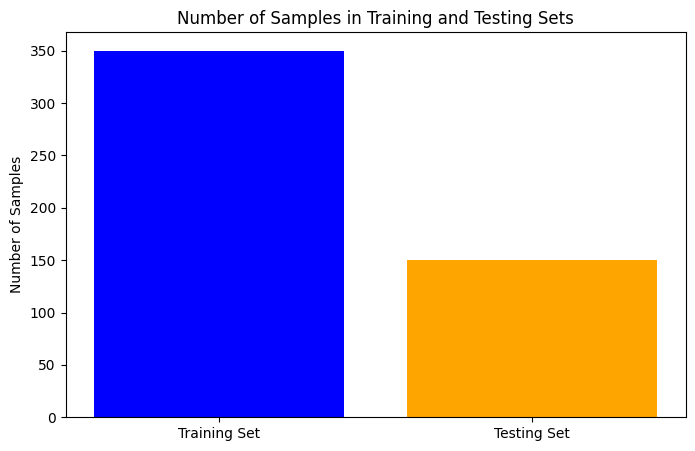

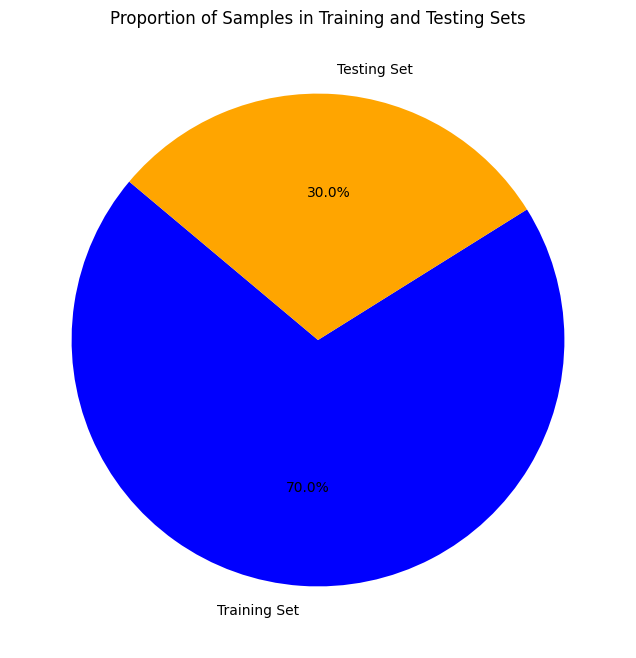

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/divorce_prediction_india.csv')

# Encode target variable
label_encoder = LabelEncoder()
data['Divorce_Status'] = label_encoder.fit_transform(data['Divorce_Status'])

# Define features (X) and target (y)
X = data.drop('Divorce_Status', axis=1)
y = data['Divorce_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the split - Bar Plot
split_counts = [X_train.shape[0], X_test.shape[0]]
split_labels = ['Training Set', 'Testing Set']

plt.figure(figsize=(8, 5))
plt.bar(split_labels, split_counts, color=['blue', 'orange'])
plt.title('Number of Samples in Training and Testing Sets')
plt.ylabel('Number of Samples')
plt.show()

# Visualize the split - Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(split_counts, labels=split_labels, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=140)
plt.title('Proportion of Samples in Training and Testing Sets')
plt.show()

In [ ]:
print(data['Divorce_Status'].value_counts())



Divorce_Status
Yes    251
No     249
Name: count, dtype: int64


# DECISION TREE VISUALIZATION

In [ ]:
!apt-get install -y graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


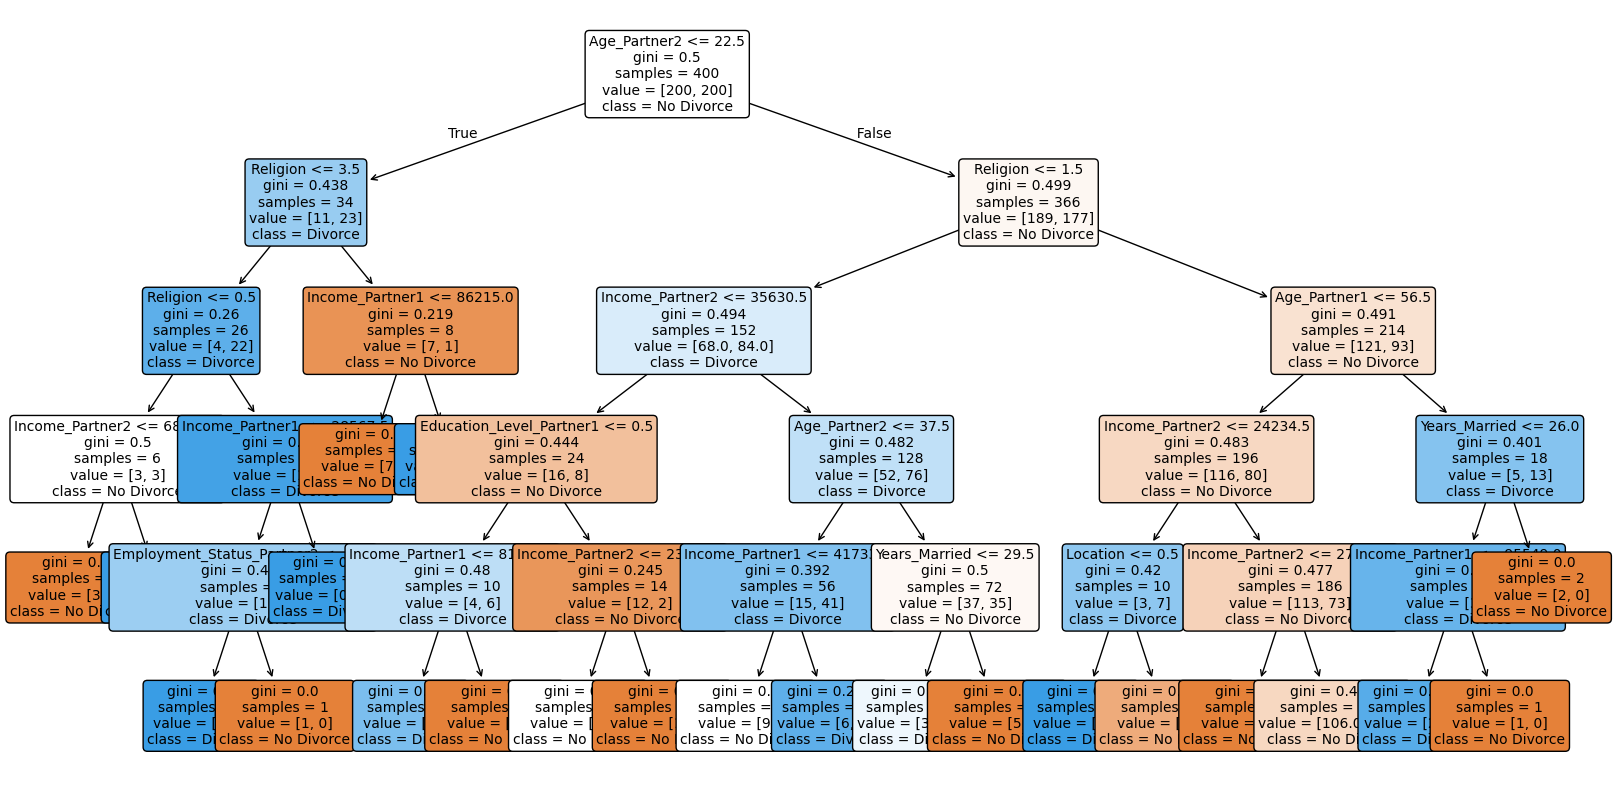

In [ ]:
# Install necessary libraries
!apt-get install -y graphviz

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset (Assuming you've uploaded the dataset as 'divorce_prediction_india.csv')
file_path = '/content/divorce_prediction_india.csv'  # Adjust the file path for Colab
data = pd.read_csv(file_path)

# Handle any missing values or necessary preprocessing
# Example: Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Separate features and target
X = data.drop('Divorce_Status', axis=1)
y = data['Divorce_Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=["No Divorce", "Divorce"], filled=True, rounded=True, fontsize=10)
plt.show()


# RANDOM FOREST VISUALIZATION

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


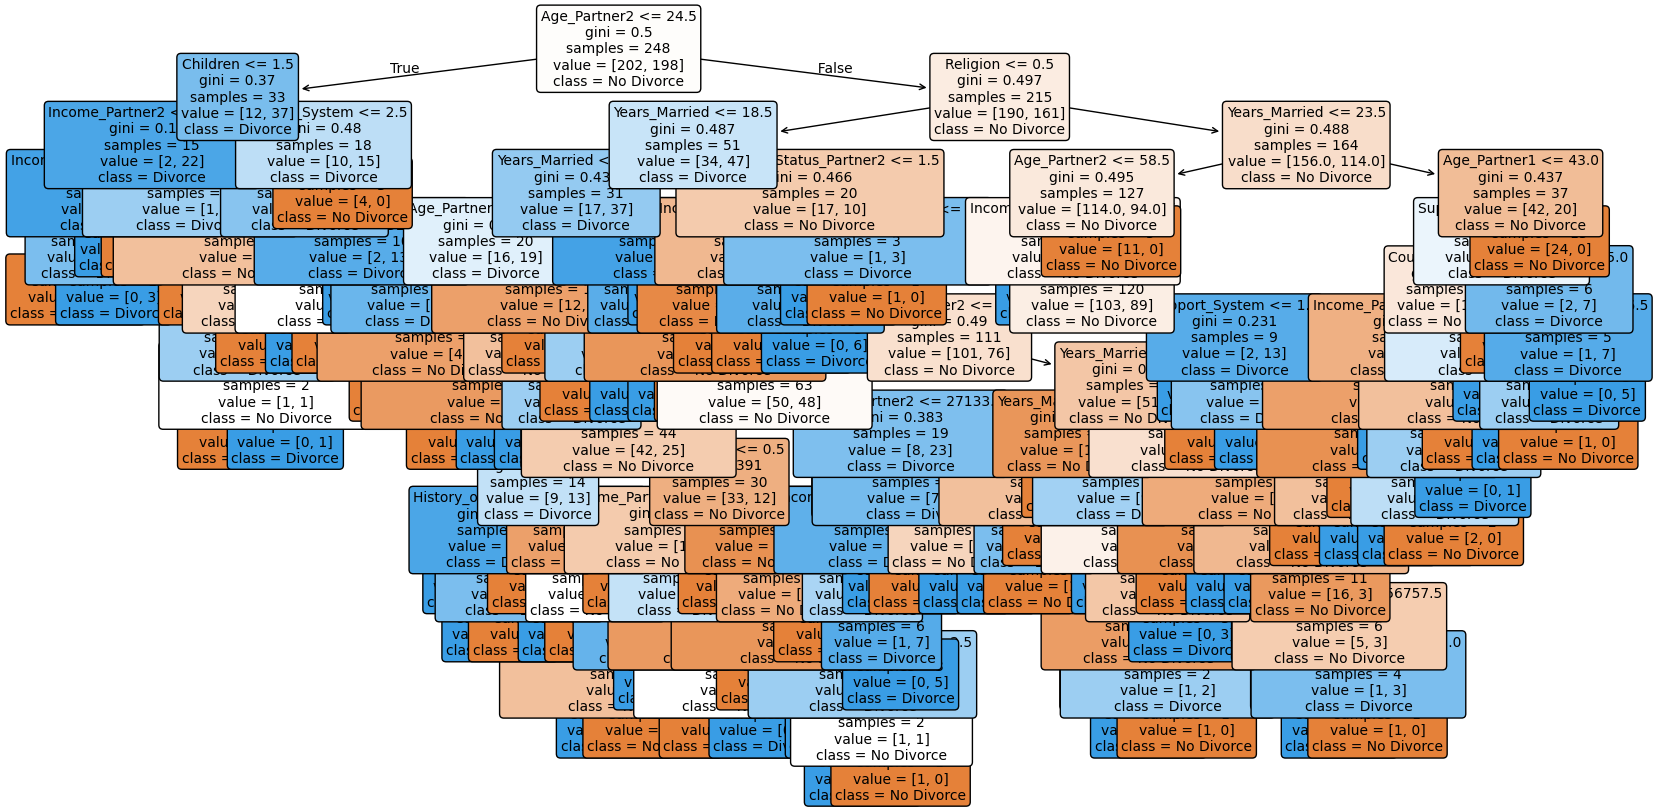

In [ ]:
# Install necessary libraries
!apt-get install -y graphviz

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset (assuming you've uploaded it to Colab)
file_path = '/content/divorce_prediction_india.csv'  # Adjust the file path as per your file location in Colab
data = pd.read_csv(file_path)

# Step 1: Preprocessing
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Step 2: Separate features and target
X = data.drop('Divorce_Status', axis=1)
y = data['Divorce_Status']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Step 5: Visualize a single tree from the Random Forest
# Extract one tree from the forest (for example, the 5th tree)
plt.figure(figsize=(20, 10))
tree_num = 5  # You can change this number to visualize different trees
plot_tree(rf_clf.estimators_[tree_num], feature_names=X.columns, class_names=["No Divorce", "Divorce"], filled=True, rounded=True, fontsize=10)
plt.show()


<ipython-input-8-a75328b37a8c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping

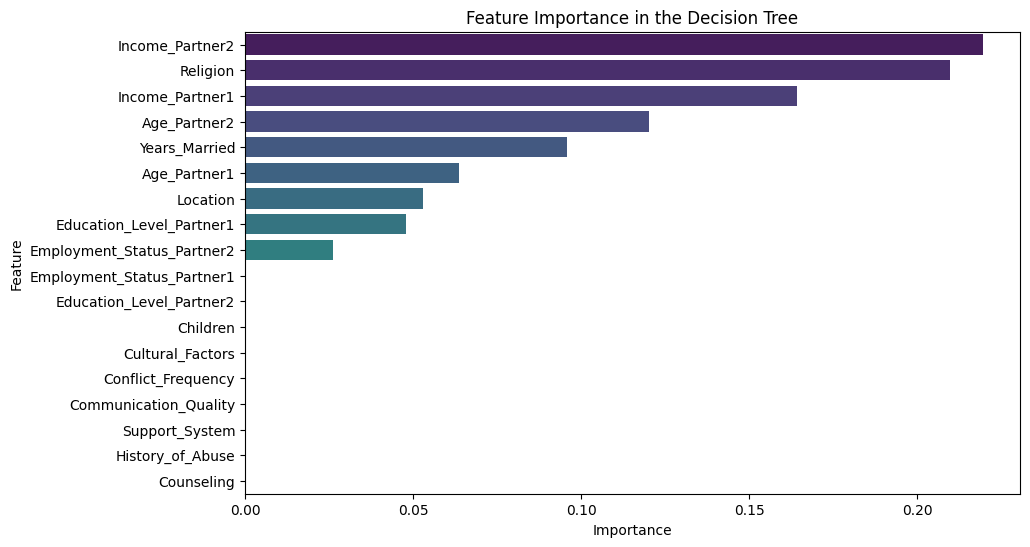

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from the decision tree
feature_importances = clf.feature_importances_

# Create a DataFrame to store feature names and their importance
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot feature importance using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df, palette="viridis")
plt.title("Feature Importance in the Decision Tree")
plt.show()


<ipython-input-10-b5b61d59d97b>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

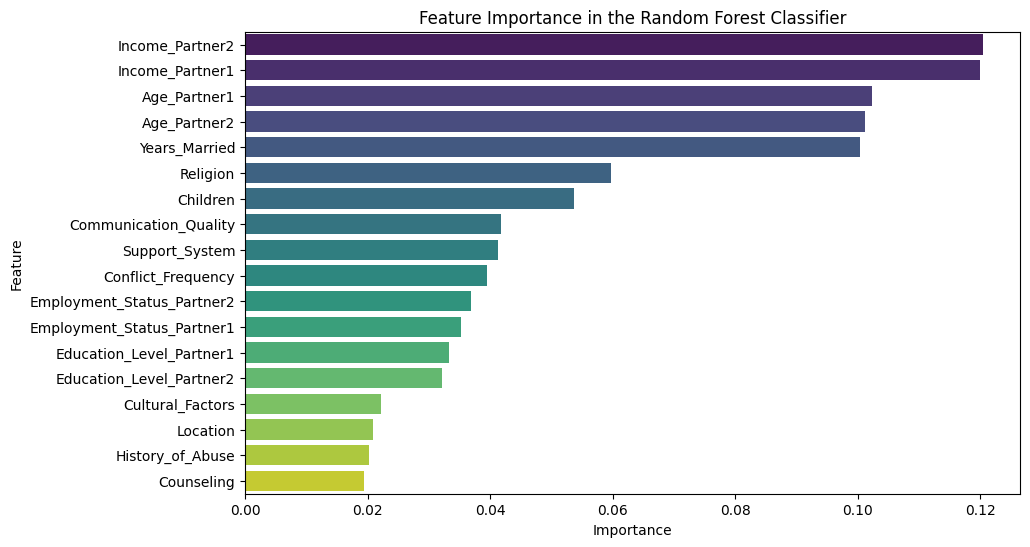

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have your feature matrix X and target vector y
# X = ...
# y = ...

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Get feature importance from the random forest
feature_importances = rf_clf.feature_importances_

# Create a DataFrame to store feature names and their importance
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot feature importance using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df, palette="viridis")
plt.title("Feature Importance in the Random Forest Classifier")
plt.show()


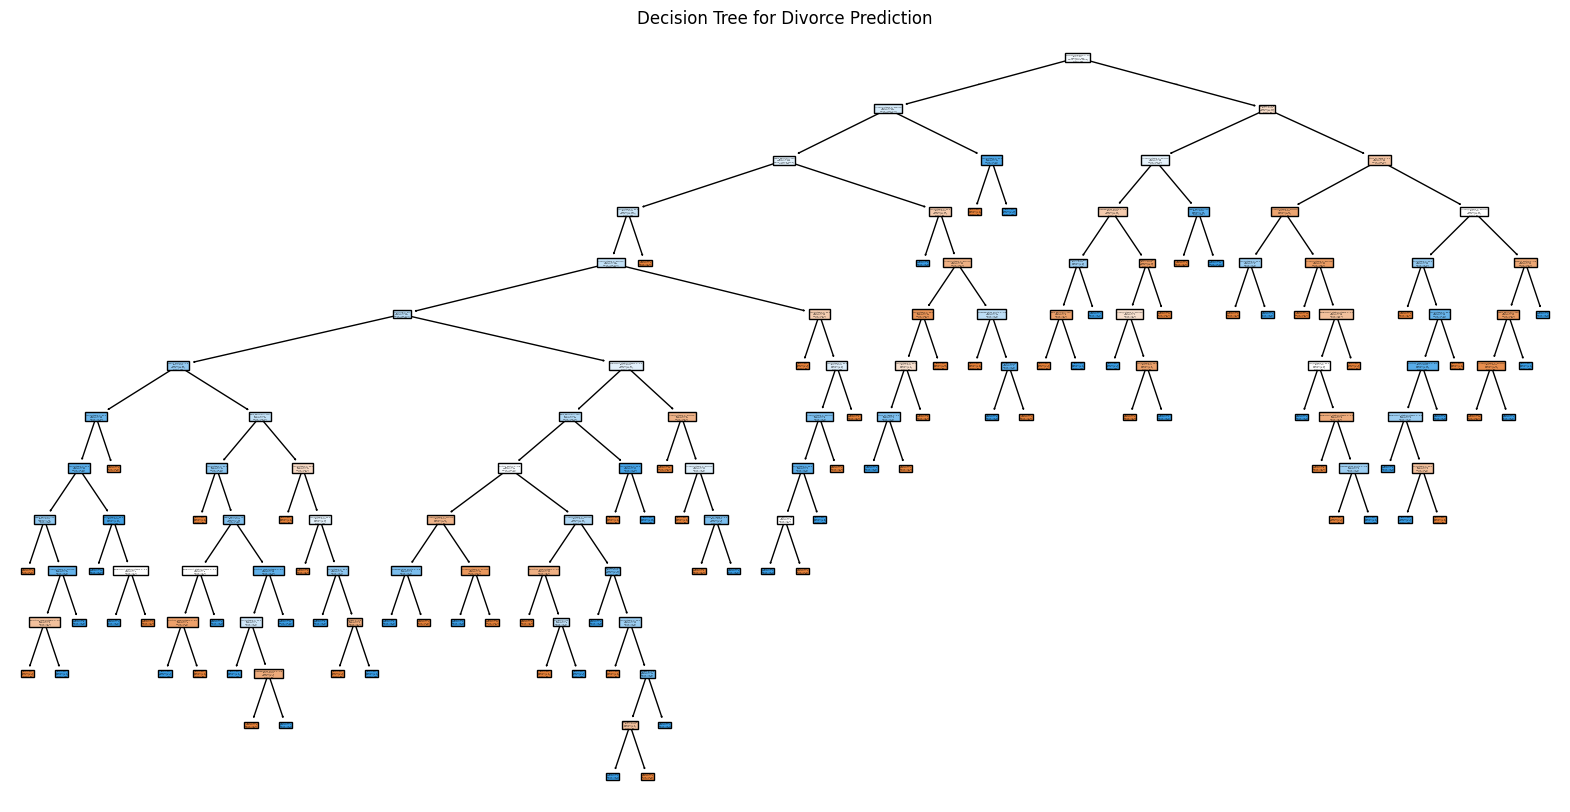

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Encode categorical columns
label_encoder = LabelEncoder()
for column in ['Education_Level_Partner1', 'Education_Level_Partner2',
               'Employment_Status_Partner1', 'Employment_Status_Partner2',
               'Location', 'Religion', 'Cultural_Factors', 'Conflict_Frequency',
               'Communication_Quality', 'Support_System', 'History_of_Abuse', 'Counseling', 'Divorce_Status']:
    data[column] = label_encoder.fit_transform(data[column])

# Split data into features (X) and target (y)
X = data.drop('Divorce_Status', axis=1)
y = data['Divorce_Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree for Divorce Prediction")
plt.show()


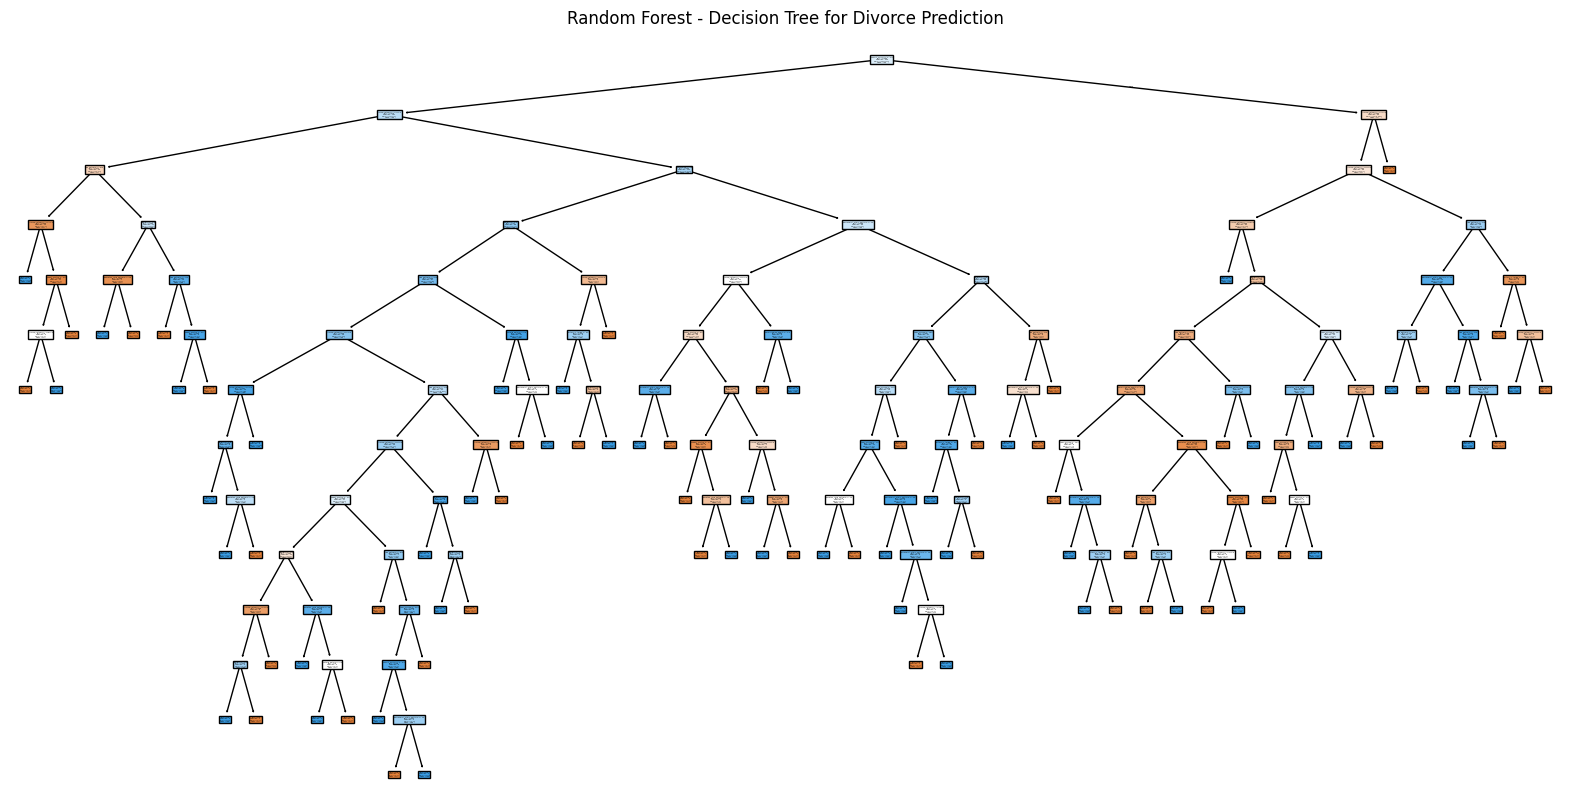

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Encode categorical columns
label_encoder = LabelEncoder()
for column in ['Education_Level_Partner1', 'Education_Level_Partner2',
               'Employment_Status_Partner1', 'Employment_Status_Partner2',
               'Location', 'Religion', 'Cultural_Factors', 'Conflict_Frequency',
               'Communication_Quality', 'Support_System', 'History_of_Abuse',
               'Counseling', 'Divorce_Status']:
    data[column] = label_encoder.fit_transform(data[column])

# Split data into features (X) and target (y)
X = data.drop('Divorce_Status', axis=1)
y = data['Divorce_Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Visualize one of the decision trees in the Random Forest
plt.figure(figsize=(20,10))
tree.plot_tree(clf.estimators_[0], feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Random Forest - Decision Tree for Divorce Prediction")
plt.show()
